### 단순한 논리 회로
- AND 게이트 : 두 입력값이 모두 1인 경우 1을 출력, 그외에는 0
- NAND 게이트 : Not AND를 의미하며, AND게이트의 동작을 뒤집는다. 입력값 둘 다 1인 경우 0, 그외에는 1
- OR 게이트 : 입력 신호 중 하나이상이 1이면 출력이 1이 된다.

### 퍼셉트론(Perceptron)?
: 다수의 신호(0 또는 1)를 입력받아 하나의 신호(0 또는 1)를 출력한다. <br>
**퍼셉트론 구조는 AND, NAND, OR 게이트 모두에서 똑같다.(가중치(weights)와 임계값(theta)만 조절해주면 다른 논리회로로 바뀐다.)**

In [1]:
# AND 구현
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    else:
        return 1

In [5]:
AND(0,0),AND(1,0),AND(0,1),AND(1,1)

(0, 0, 0, 1)

In [8]:
# weights and bias 도입
x = np.array([0,1])
w = np.array([0.5, 0.5])
b = -0.7

print(w*x, np.sum(w*x))
print(np.sum(w*x) + b)

[0.  0.5] 0.5
-0.19999999999999996


In [9]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [10]:
AND(0,0),AND(1,0),AND(0,1),AND(1,1)

(0, 0, 0, 1)

In [13]:
# NAND 구현
def NAND(x1, x2):
    """
    AND와 weights와 bias만 다르다
    """
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [14]:
NAND(0,0),NAND(1,0),NAND(0,1),NAND(1,1)

(1, 1, 1, 0)

In [15]:
# OR 구현
def OR(x1, x2):
    """
    AND와 weights와 bias만 다르다
    """
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1    

In [16]:
OR(0,0),OR(1,0),OR(0,1),OR(1,1)

(0, 1, 1, 1)

### 퍼셉트론의 한계 : XOR 게이트
: 직선하나로 영역을 구분하기 불가능하다.

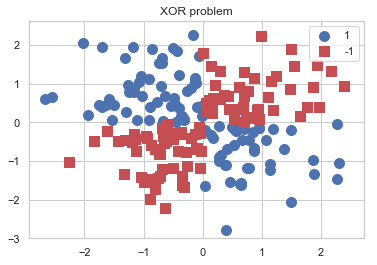

In [17]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='o', label='1', s=100)
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1', s=100)
plt.ylim(-3.0)
plt.legend()
plt.title("XOR problem")
plt.show()

In [18]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y== 1, 0], X[y== 1, 1], c='b', marker='o', label='+1', s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', marker='s', label='-1', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

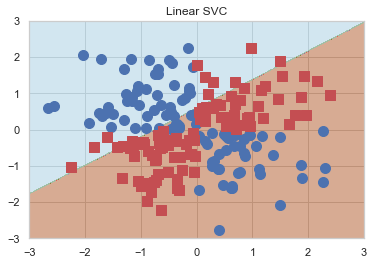

In [19]:
from sklearn.svm import SVC

svc = SVC(kernel="linear").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "Linear SVC")

In [22]:
# XOR 구현
# AND, NAND, OR 조합하여 구현하기
def XOR(x1, x2):
    """
    다층 구조를 가진 다층 퍼셉트론 
    """
    s1 = NAND(x1,x2) # 1층
    s2 = OR(x1,x2) # 1층
    y = AND(s1,s2) # 2층
    return y

In [21]:
XOR(0,0),XOR(1,0),XOR(0,1),XOR(1,1)

(0, 1, 1, 0)

**공장의 조립라인처럼 부품을 전달받아(1층) 다듬고 2층으로 전달하여 완성품을 만들어내는 과정이라고 보면 될 것 같다.** <br>

**컴퓨터가 수행하는 복잡한 처리도 퍼셉트론이 표현할 수 있게 되었지만, weights 설정을 사람이 직접 해줘야 한다는 문제점이 있다.** <br>

**이 문제점을 신경망에서 해결해보자**